# **Imports**

In [ ]:
# pip install keras_tuner 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD
import keras_tuner as kt
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

# **Load Data**

In [ ]:
X = pd.read_csv("tox21_global_cdf_rdkit.csv")
X = X.drop("('RDKit2DNormalized_calculated', <class 'bool'>)",axis = 1)

si = SimpleImputer(missing_values=np.nan,strategy="mean")
X = si.fit_transform(X)

X=pd.DataFrame(X)
X.shape


(7831, 200)

In [ ]:
y = pd.read_csv("tox21.csv")
y = y["NR-AR"]
             # setoon task ra be entehaye feature ha michasbanim
y.isnull().sum()
y=pd.DataFrame(y)
X["y"]=y
X.shape


(7831, 201)

In [ ]:
X=X.dropna(subset=["y"])
X.shape

(7265, 201)

In [ ]:
# hal ke dade ha moratab va tamiz shod aanha ra joda mikonim: 
y=X["y"]
y=pd.DataFrame(y)
y.shape

(7265, 1)

In [ ]:
y.isnull().sum()

y    0
dtype: int64

In [ ]:
y.value_counts()

y  
0.0    6956
1.0     309
dtype: int64

In [ ]:
X=X.drop("y",axis=1)
X=pd.DataFrame(X)
X.shape

(7265, 200)

In [ ]:
X.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

In [ ]:
X_trainval, X_test, y_trainval, y_test= train_test_split(X, y, test_size = 0.1,stratify=y, random_state = 1)

In [ ]:
y_trainval.value_counts()

y  
0.0    6260
1.0     278
dtype: int64

In [ ]:
y_test.value_counts()

y  
0.0    696
1.0     31
dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.1,stratify=y_trainval, random_state = 1)

In [ ]:
y_train.value_counts()

y  
0.0    5634
1.0     250
dtype: int64

In [ ]:
y_val.value_counts()

y  
0.0    626
1.0     28
dtype: int64

# **GS**

### **Create Model for Grid Search**


In [ ]:
#1 hidden layers
def create_model_for_GS(optimizer = 'Adam', activation_h = 'relu', init_mode_h = 'uniform',init_mode_o = 'uniform', dropout_rate_h = 0.0 , neurons_h = 50):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

### **Grid Search**

In [ ]:
model_for_GS = KerasClassifier(build_fn = create_model_for_GS, epochs = 50)

optimizer = ['SGD', 'Adam']
# init_mode_h = ['uniform', 'normal']
# init_mode_o = ['uniform','normal']
# dropout_rate_h = [0.1,0.2,0.4]
neurons_h = [100,300,500]

param_grid = dict(optimizer=optimizer,neurons_h=neurons_h)
grid = GridSearchCV(estimator = model_for_GS, param_grid = param_grid, cv = 5)
grid_result = grid.fit(X_trainval, y_trainval)

print(f"Best mean cross-validation score: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Epoch 1/50
164/164 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.9520
Epoch 2/50
164/164 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9568
Epoch 3/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9568
Epoch 4/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9568
Epoch 5/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9568
Epoch 6/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9568
Epoch 7/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9568
Epoch 8/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.9568
Epoch 9/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9568
Epoch 10/50
164/164 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9568

In [ ]:
print(f"test set score: {grid_result.score(X_test,y_test)}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9642
test set score: 0.9642366170883179


In [ ]:
#1 hidden layers
def create_model_for_GS(optimizer = 'SGD', activation_h = 'relu', init_mode_h = 'uniform',init_mode_o = 'uniform', dropout_rate_h = 0.0 , neurons_h = 300):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [ ]:
model_for_GS = KerasClassifier(build_fn = create_model_for_GS, epochs = 50)

init_mode_h = ['uniform', 'normal']
init_mode_o = ['uniform','normal']
dropout_rate_h = [0.0,0.1,0.2,0.4]

param_grid = dict(init_mode_h=init_mode_h,init_mode_o=init_mode_o,dropout_rate_h=dropout_rate_h)
grid = GridSearchCV(estimator = model_for_GS, param_grid = param_grid, cv = 5)
grid_result = grid.fit(X_trainval, y_trainval)

print(f"Best mean cross-validation score: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Streaming output truncated to the last 5000 lines.
Epoch 26/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1156 - accuracy: 0.9734
Epoch 27/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1142 - accuracy: 0.9740
Epoch 28/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1140 - accuracy: 0.9742
Epoch 29/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1147 - accuracy: 0.9736
Epoch 30/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1126 - accuracy: 0.9738
Epoch 31/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1137 - accuracy: 0.9742
Epoch 32/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1133 - accuracy: 0.9738
Epoch 33/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1122 - accuracy: 0.9742
Epoch 34/50
164/164 [==============================] - 1s 4ms/step - loss: 0.1122 - accuracy: 0.9744
Epoch 35/50
164/164 [===================

In [ ]:
print(f"test set score: {grid_result.score(X_test,y_test)}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.9656
test set score: 0.9656121134757996


### **define final model model for GS**

In [ ]:
#1 hidden layers
def create_final_model_for_GS(optimizer = 'SGD', activation_h = 'relu', init_mode_h = 'uniform',init_mode_o = 'normal', dropout_rate_h = 0.0 , neurons_h = 300):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

Epoch 1/500
184/184 [==============================] - 1s 5ms/step - loss: 0.2843 - accuracy: 0.9534 - val_loss: 0.1904 - val_accuracy: 0.9572
Epoch 2/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1797 - accuracy: 0.9575 - val_loss: 0.1703 - val_accuracy: 0.9572
Epoch 3/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1669 - accuracy: 0.9575 - val_loss: 0.1552 - val_accuracy: 0.9572
Epoch 4/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9575 - val_loss: 0.1429 - val_accuracy: 0.9572
Epoch 5/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1501 - accuracy: 0.9575 - val_loss: 0.1332 - val_accuracy: 0.9572
Epoch 6/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1449 - accuracy: 0.9575 - val_loss: 0.1258 - val_accuracy: 0.9572
Epoch 7/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1413 - accuracy: 0.9575 - val_loss: 0.1203 - val_accuracy: 0.9572

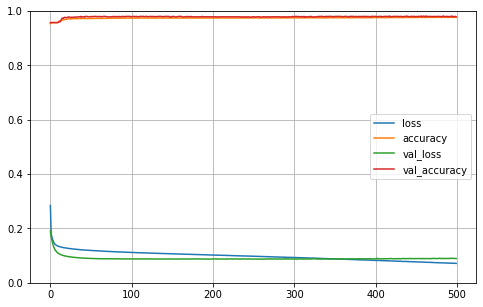

In [ ]:
GS_model = create_final_model_for_GS()

history = GS_model.fit(X_train, y_train, epochs = 500,validation_data=(X_val, y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
GS_model.summary()

Model: "sequential_369"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_778 (Dense)           (None, 300)               60300     
                                                                 
 dropout_409 (Dropout)       (None, 300)               0         
                                                                 
 dense_779 (Dense)           (None, 1)                 301       
                                                                 
Total params: 60,601
Trainable params: 60,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# GS_model.save("my_GS_model")
# GS_model= keras.models.load_model("my_GS_model")

In [ ]:
f=GS_model.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9656
test set loss: 0.13310019671916962  , test set accuracy : 0.9656121134757996


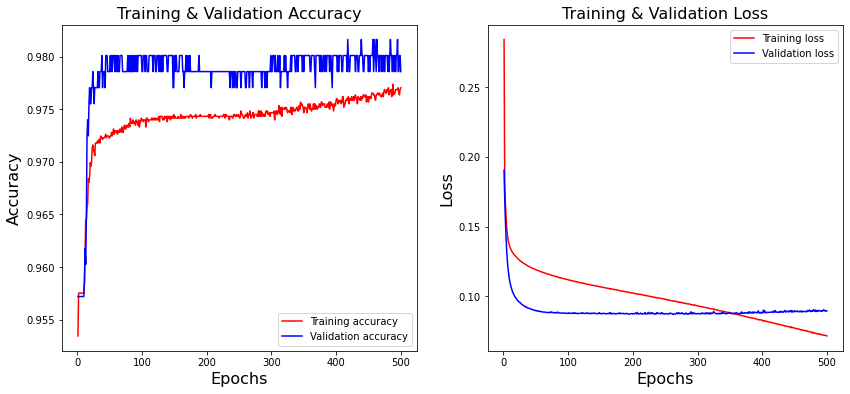

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()


**BEST**

Epoch 1/350
184/184 [==============================] - 1s 4ms/step - loss: 0.2764 - accuracy: 0.9573 - val_loss: 0.1959 - val_accuracy: 0.9572
Epoch 2/350
184/184 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9575 - val_loss: 0.1745 - val_accuracy: 0.9572
Epoch 3/350
184/184 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9575 - val_loss: 0.1582 - val_accuracy: 0.9572
Epoch 4/350
184/184 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9575 - val_loss: 0.1450 - val_accuracy: 0.9572
Epoch 5/350
184/184 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.9575 - val_loss: 0.1348 - val_accuracy: 0.9572
Epoch 6/350
184/184 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9575 - val_loss: 0.1270 - val_accuracy: 0.9572
Epoch 7/350
184/184 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9575 - val_loss: 0.1211 - val_accuracy: 0.9572

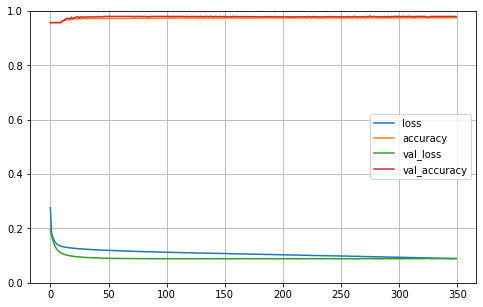

In [ ]:
GS_modelbest = create_final_model_for_GS()

history = GS_modelbest.fit(X_train, y_train, epochs = 350,validation_data=(X_val, y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
f=GS_modelbest.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9684
test set loss: 0.1297820657491684  , test set accuracy : 0.9683631658554077


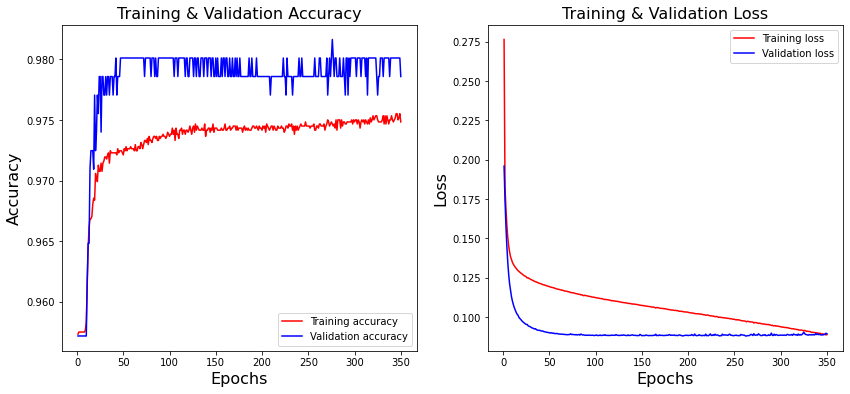

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()


# **KT**

## **1 hidden layer**

### **Create Model for Keras Tuner**

In [ ]:
# 1 hidden layer
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [200],
        )
    )


    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    # model.add(
    #     Dense(
    #         units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
    #         activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
    #     )
    # )

    # if hp.Boolean("dropout_2"):
    #     model.add(Dropout(rate = 0.2))
    
    
    model.add(Dense(1, activation="sigmoid"))

    learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(learning_rate=learning_rate),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Trial 50 Complete [00h 00m 41s]
val_accuracy: 0.9847095012664795

Best val_accuracy So Far: 0.9847095012664795
Total elapsed time: 00h 31m 21s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 360
activation_1: relu
dropout_1: True
lr: 0.1
Score: 0.9847095012664795


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 200))
b=best_model.evaluate(X_test, y_test)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 1s 4ms/step - loss: 0.1294 - accuracy: 0.9684
test set loss: 0.1293977051973343 , test set accuracy : 0.9683631658554077


In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 200),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 200),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 360,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'bias_constraint': None,

### **define final model model for KT**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(310, activation = 'relu', input_shape = [200]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

Epoch 1/100
184/184 [==============================] - 1s 5ms/step - loss: 0.1571 - accuracy: 0.9589 - val_loss: 0.1055 - val_accuracy: 0.9755
Epoch 2/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9670 - val_loss: 0.0944 - val_accuracy: 0.9786
Epoch 3/100
184/184 [==============================] - 1s 5ms/step - loss: 0.1262 - accuracy: 0.9703 - val_loss: 0.0907 - val_accuracy: 0.9801
Epoch 4/100
184/184 [==============================] - 1s 4ms/step - loss: 0.1237 - accuracy: 0.9716 - val_loss: 0.0891 - val_accuracy: 0.9801
Epoch 5/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1220 - accuracy: 0.9723 - val_loss: 0.0888 - val_accuracy: 0.9801
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1192 - accuracy: 0.9718 - val_loss: 0.0894 - val_accuracy: 0.9786
Epoch 7/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1174 - accuracy: 0.9725 - val_loss: 0.0866 - val_accuracy: 0.9786

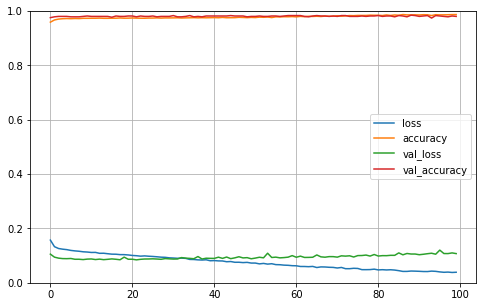

In [ ]:
KT_model_1 = create_final_model_for_KT()

history = KT_model_1.fit(X_train, y_train, epochs = 100, validation_data=(X_val,y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_1.summary()

Model: "sequential_367"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_774 (Dense)           (None, 310)               62310     
                                                                 
 dropout_407 (Dropout)       (None, 310)               0         
                                                                 
 dense_775 (Dense)           (None, 1)                 311       
                                                                 
Total params: 62,621
Trainable params: 62,621
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_1.save("my_KT_model_1")
# KT_model_1= keras.models.load_model("my_KT_model_1")

In [ ]:
f=KT_model_1.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9697
test set loss: 0.16156667470932007  , test set accuracy : 0.9697386622428894


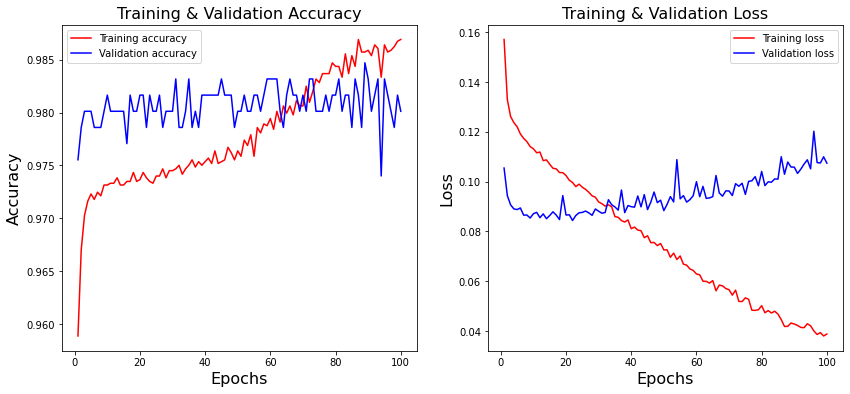

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

**BEST**

Epoch 1/32
184/184 [==============================] - 1s 5ms/step - loss: 0.1525 - accuracy: 0.9601 - val_loss: 0.1039 - val_accuracy: 0.9740
Epoch 2/32
184/184 [==============================] - 1s 3ms/step - loss: 0.1317 - accuracy: 0.9680 - val_loss: 0.0945 - val_accuracy: 0.9786
Epoch 3/32
184/184 [==============================] - 1s 3ms/step - loss: 0.1289 - accuracy: 0.9699 - val_loss: 0.0913 - val_accuracy: 0.9786
Epoch 4/32
184/184 [==============================] - 1s 3ms/step - loss: 0.1243 - accuracy: 0.9709 - val_loss: 0.0908 - val_accuracy: 0.9786
Epoch 5/32
184/184 [==============================] - 1s 3ms/step - loss: 0.1233 - accuracy: 0.9716 - val_loss: 0.0902 - val_accuracy: 0.9786
Epoch 6/32
184/184 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9713 - val_loss: 0.0907 - val_accuracy: 0.9786
Epoch 7/32
184/184 [==============================] - 1s 3ms/step - loss: 0.1192 - accuracy: 0.9720 - val_loss: 0.0880 - val_accuracy: 0.9786
Epoch 

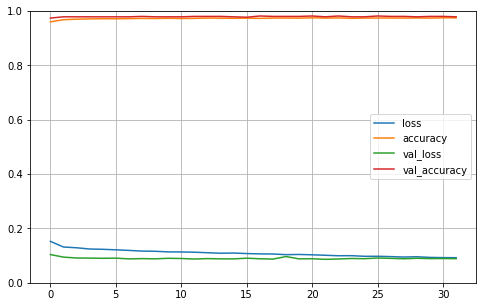

In [ ]:
KT_model_1best = create_final_model_for_KT()

history = KT_model_1best.fit(X_train, y_train, epochs = 32, validation_data=(X_val,y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
f=KT_model_1best.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9684
test set loss: 0.1261911541223526  , test set accuracy : 0.9683631658554077


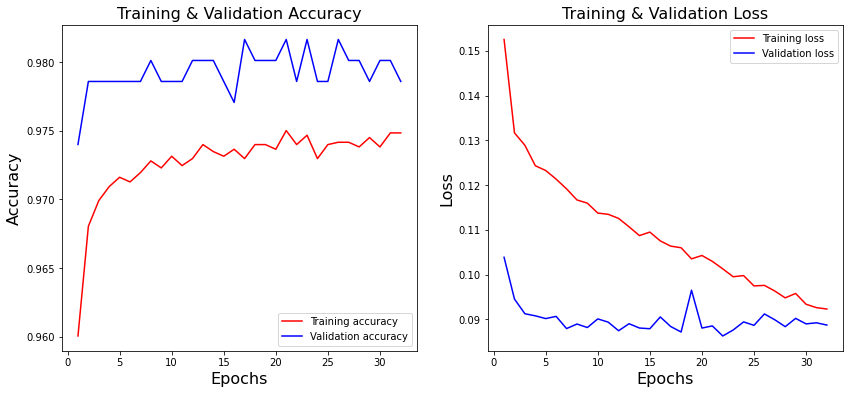

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## **2 hidden layers**

### **Create Model for Keras Tuner**

In [ ]:
# 2 hidden layers
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [200],
        )
    )

    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    model.add(
        Dense(
            units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
        )
    )

    if hp.Boolean("dropout_2"):
        model.add(Dropout(rate = 0.2))

    
    model.add(Dense(1, activation="sigmoid"))

    learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(learning_rate=learning_rate),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Trial 50 Complete [00h 00m 41s]
val_accuracy: 0.9847095012664795

Best val_accuracy So Far: 0.9847095012664795
Total elapsed time: 00h 35m 06s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 260
activation_1: relu
dropout_1: True
units_2: 410
activation_2: relu
dropout_2: True
lr: 0.1
Score: 0.9847095012664795


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 200))
b=best_model.evaluate(X_test, y_test)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

In [ ]:
best_model.get_config()

### **define final model model for KT**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'relu', input_shape = [200]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(410, activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

Epoch 1/100
184/184 [==============================] - 2s 8ms/step - loss: 0.1626 - accuracy: 0.9567 - val_loss: 0.1029 - val_accuracy: 0.9771
Epoch 2/100
184/184 [==============================] - 1s 6ms/step - loss: 0.1350 - accuracy: 0.9680 - val_loss: 0.0891 - val_accuracy: 0.9786
Epoch 3/100
184/184 [==============================] - 1s 6ms/step - loss: 0.1261 - accuracy: 0.9709 - val_loss: 0.0861 - val_accuracy: 0.9817
Epoch 4/100
184/184 [==============================] - 1s 6ms/step - loss: 0.1238 - accuracy: 0.9711 - val_loss: 0.0845 - val_accuracy: 0.9801
Epoch 5/100
184/184 [==============================] - 1s 6ms/step - loss: 0.1209 - accuracy: 0.9728 - val_loss: 0.0829 - val_accuracy: 0.9801
Epoch 6/100
184/184 [==============================] - 1s 6ms/step - loss: 0.1164 - accuracy: 0.9723 - val_loss: 0.0856 - val_accuracy: 0.9801
Epoch 7/100
184/184 [==============================] - 1s 6ms/step - loss: 0.1142 - accuracy: 0.9735 - val_loss: 0.0828 - val_accuracy: 0.9801

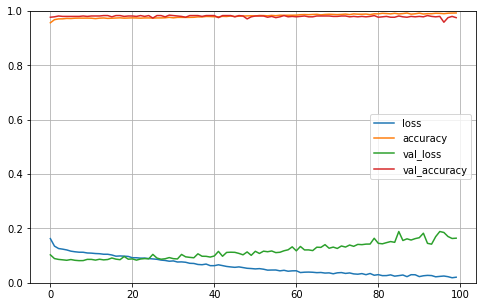

In [ ]:
KT_model_2 = create_final_model_for_KT()

history = KT_model_2.fit(X_train, y_train, epochs = 100, validation_data=(X_val,y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_2.summary()

Model: "sequential_373"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_787 (Dense)           (None, 260)               52260     
                                                                 
 dropout_414 (Dropout)       (None, 260)               0         
                                                                 
 dense_788 (Dense)           (None, 410)               107010    
                                                                 
 dropout_415 (Dropout)       (None, 410)               0         
                                                                 
 dense_789 (Dense)           (None, 1)                 411       
                                                                 
Total params: 159,681
Trainable params: 159,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_2.save("my_KT_model_2")
# KT_model_2= keras.models.load_model("my_KT_model_2")

In [ ]:
f=KT_model_2.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.9587
test set loss: 0.2514095902442932  , test set accuracy : 0.9587345123291016


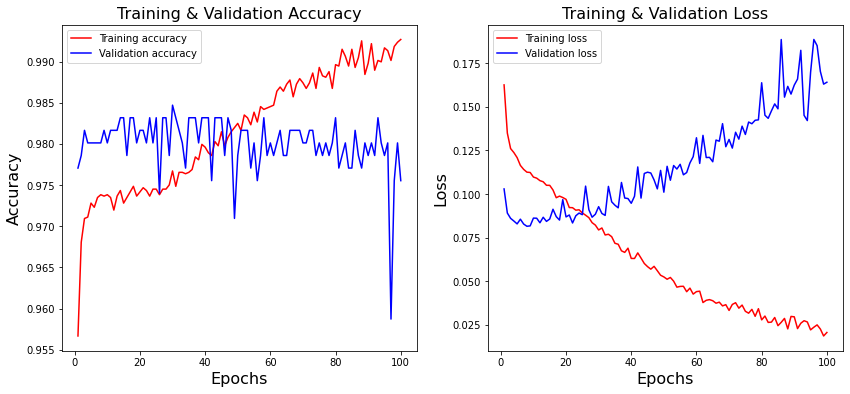

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

BEST

Epoch 1/25
184/184 [==============================] - 2s 7ms/step - loss: 0.1626 - accuracy: 0.9548 - val_loss: 0.1082 - val_accuracy: 0.9786
Epoch 2/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1345 - accuracy: 0.9675 - val_loss: 0.0915 - val_accuracy: 0.9786
Epoch 3/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1256 - accuracy: 0.9701 - val_loss: 0.0871 - val_accuracy: 0.9786
Epoch 4/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1239 - accuracy: 0.9701 - val_loss: 0.0865 - val_accuracy: 0.9771
Epoch 5/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1192 - accuracy: 0.9728 - val_loss: 0.0853 - val_accuracy: 0.9786
Epoch 6/25
184/184 [==============================] - 1s 6ms/step - loss: 0.1173 - accuracy: 0.9718 - val_loss: 0.0880 - val_accuracy: 0.9786
Epoch 7/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1138 - accuracy: 0.9735 - val_loss: 0.0838 - val_accuracy: 0.9786
Epoch 

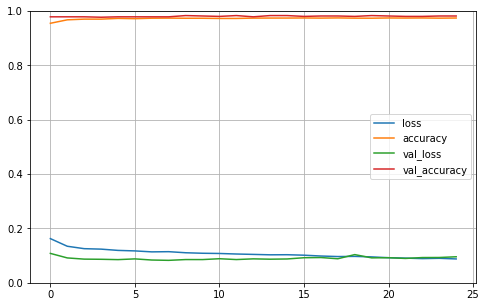

In [ ]:
KT_model_2best = create_final_model_for_KT()

history = KT_model_2best.fit(X_train, y_train, epochs = 25, validation_data=(X_val,y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
f=KT_model_2best.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9670
test set loss: 0.1345330774784088  , test set accuracy : 0.9669876098632812


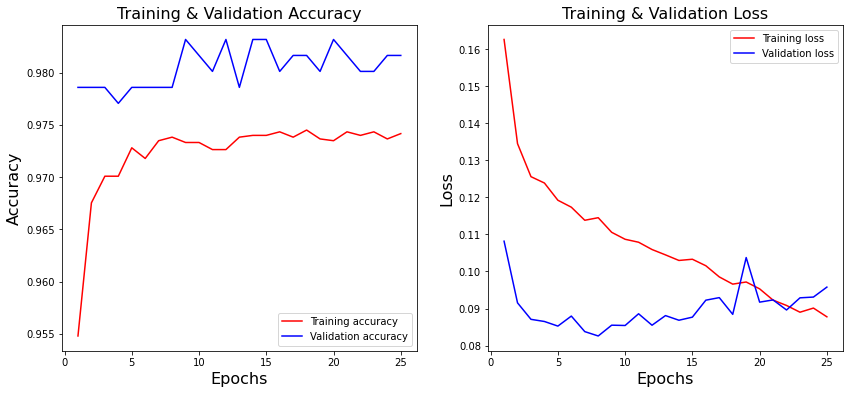

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

# **Ensemble**

### **Bagging-GS**

In [ ]:
#1 hidden layers
def create_final_model_for_GS(optimizer = 'SGD', activation_h = 'relu', init_mode_h = 'uniform',init_mode_o = 'normal', dropout_rate_h = 0.0 , neurons_h = 300):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_GS = KerasClassifier(build_fn = create_final_model_for_GS, epochs =50)
bag_clf_GS = BaggingClassifier( base_estimator = model_for_bagging_GS, n_estimators=20, max_samples=1000 , bootstrap=True , random_state=1)
bag_clf_GS.fit(X_trainval, y_trainval)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32/32 [==============================] - 1s 4ms/step - loss: 0.5401 - accuracy: 0.8640
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.9660
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9660
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1886 - accuracy: 0.9660
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1743 - accuracy: 0.9660
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1671 - accuracy: 0.9660
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1628 - accuracy: 0.9660
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9660
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9660
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9660
Epoch 11/50
32/32 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0925283550>,
                  max_samples=1000, n_estimators=20, random_state=1)

In [ ]:
y_pred = bag_clf_GS.predict(X_test)
print(f"test set accuracy :{accuracy_score(y_test, y_pred)}")

test set accuracy :0.9573590096286108


**out of bag**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_GS, epochs =50)
outbag_clf_GS = BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=1000, oob_score=True, bootstrap=True, random_state=1)
outbag_clf_GS.fit(X_trainval, y_trainval)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32/32 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.9560
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.9660
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9660
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9660
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9660
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9660
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9660
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9660
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1595 - accuracy: 0.9660
Epoch 10/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1576 - accuracy: 0.9660
Epoch 11/50
32/32 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0911d38e10>,
                  max_samples=1000, n_estimators=20, oob_score=True,
                  random_state=1)

In [ ]:
print(f"accuracy for out-of-bag : {outbag_clf_GS.oob_score_}")

accuracy for out-of-bag : 0.9574793514836342


In [ ]:
y_pred = outbag_clf_GS.predict(X_test)
print(f"test set accuracy : {accuracy_score(y_test, y_pred)}")

test set accuracy : 0.9573590096286108


In [ ]:
# outbag_clf_GS.oob_decision_function_

### **Bagging-KT-1** 

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(310, activation = 'relu', input_shape = [200]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_KT = KerasClassifier(build_fn = create_final_model_for_KT, epochs =32)
bag_clf_KT1 = BaggingClassifier( base_estimator = model_for_bagging_KT, n_estimators=20, max_samples=1000 , bootstrap=True , random_state=1)
bag_clf_KT1.fit(X_trainval, y_trainval)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/32
32/32 [==============================] - 1s 4ms/step - loss: 0.1913 - accuracy: 0.9460
Epoch 2/32
32/32 [==============================] - 0s 5ms/step - loss: 0.1388 - accuracy: 0.9660
Epoch 3/32
32/32 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.9660
Epoch 4/32
32/32 [==============================] - 0s 4ms/step - loss: 0.1181 - accuracy: 0.9660
Epoch 5/32
32/32 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9660
Epoch 6/32
32/32 [==============================] - 0s 6ms/step - loss: 0.1086 - accuracy: 0.9670
Epoch 7/32
32/32 [==============================] - 0s 7ms/step - loss: 0.1039 - accuracy: 0.9710
Epoch 8/32
32/32 [==============================] - 0s 6ms/step - loss: 0.1026 - accuracy: 0.9700
Epoch 9/32
32/32 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9720
Epoch 10/32
32/32 [==============================] - 0s 5ms/step - loss: 0.0973 - accuracy: 0.9720
Epoch 11/32
32/32 [

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f08fb1d2950>,
                  max_samples=1000, n_estimators=20, random_state=1)

In [ ]:
y_pred = bag_clf_KT1.predict(X_test)
print(f"test set accuracy :{accuracy_score(y_test, y_pred)}")

test set accuracy :0.9642365887207703


**out of bag**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_KT, epochs =32)
outbag_clf_KT1 = BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=1000, oob_score=True, bootstrap=True, random_state=1)
outbag_clf_KT1.fit(X_trainval, y_trainval)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/32
32/32 [==============================] - 1s 4ms/step - loss: 0.1936 - accuracy: 0.9410
Epoch 2/32
32/32 [==============================] - 0s 4ms/step - loss: 0.1386 - accuracy: 0.9660
Epoch 3/32
32/32 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9660
Epoch 4/32
32/32 [==============================] - 0s 4ms/step - loss: 0.1189 - accuracy: 0.9660
Epoch 5/32
32/32 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9660
Epoch 6/32
32/32 [==============================] - 0s 5ms/step - loss: 0.1102 - accuracy: 0.9680
Epoch 7/32
32/32 [==============================] - 0s 6ms/step - loss: 0.1047 - accuracy: 0.9710
Epoch 8/32
32/32 [==============================] - 0s 6ms/step - loss: 0.1022 - accuracy: 0.9670
Epoch 9/32
32/32 [==============================] - 0s 6ms/step - loss: 0.0978 - accuracy: 0.9700
Epoch 10/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0980 - accuracy: 0.9710
Epoch 11/32
32/32 [

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f08e95550d0>,
                  max_samples=1000, n_estimators=20, oob_score=True,
                  random_state=1)

In [ ]:
print(f"accuracy for out-of-bag : {outbag_clf_KT1.oob_score_}")

accuracy for out-of-bag : 0.9732334047109208


In [ ]:
y_pred = outbag_clf_KT1.predict(X_test)
print(f"test set accuracy : {accuracy_score(y_test, y_pred)}")


test set accuracy : 0.9656121045392022


In [ ]:
# outbag_clf_KT1.oob_decision_function_

### **Bagging-KT-2** 

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'relu', input_shape = [200]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(410, activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_KT = KerasClassifier(build_fn = create_final_model_for_KT, epochs =25)
bag_clf_KT2 = BaggingClassifier( base_estimator = model_for_bagging_KT, n_estimators=20, max_samples=1000 , bootstrap=True , random_state=1)
bag_clf_KT2.fit(X_trainval, y_trainval)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/25
32/32 [==============================] - 1s 5ms/step - loss: 0.1950 - accuracy: 0.9590
Epoch 2/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1445 - accuracy: 0.9660
Epoch 3/25
32/32 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.9660
Epoch 4/25
32/32 [==============================] - 0s 5ms/step - loss: 0.1237 - accuracy: 0.9660
Epoch 5/25
32/32 [==============================] - 0s 5ms/step - loss: 0.1137 - accuracy: 0.9680
Epoch 6/25
32/32 [==============================] - 0s 5ms/step - loss: 0.1073 - accuracy: 0.9680
Epoch 7/25
32/32 [==============================] - 0s 5ms/step - loss: 0.1090 - accuracy: 0.9720
Epoch 8/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9670
Epoch 9/25
32/32 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9720
Epoch 10/25
32/32 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.9710
Epoch 11/25
32/32 [

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0931d95b90>,
                  max_samples=1000, n_estimators=20, random_state=1)

In [ ]:
y_pred = bag_clf_KT2.predict(X_test)
print(f"test set accuracy :{accuracy_score(y_test, y_pred)}")

test set accuracy :0.9656121045392022


**out of bag**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_KT, epochs =25)
outbag_clf_KT2 = BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=1000, oob_score=True, bootstrap=True, random_state=1)
outbag_clf_KT2.fit(X_trainval, y_trainval)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/25
32/32 [==============================] - 1s 4ms/step - loss: 0.1956 - accuracy: 0.9570
Epoch 2/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 0.9660
Epoch 3/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.9660
Epoch 4/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1164 - accuracy: 0.9660
Epoch 5/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9680
Epoch 6/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1097 - accuracy: 0.9670
Epoch 7/25
32/32 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9690
Epoch 8/25
32/32 [==============================] - 0s 4ms/step - loss: 0.0990 - accuracy: 0.9680
Epoch 9/25
32/32 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9740
Epoch 10/25
32/32 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9700
Epoch 11/25
32/32 [

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f08b87986d0>,
                  max_samples=1000, n_estimators=20, oob_score=True,
                  random_state=1)

In [ ]:
print(f"accuracy for out-of-bag : {outbag_clf_KT2.oob_score_}")

accuracy for out-of-bag : 0.9733863566840012


In [ ]:
y_pred = outbag_clf_KT2.predict(X_test)
print(f"test set accuracy : {accuracy_score(y_test, y_pred)}")


test set accuracy : 0.9656121045392022


In [ ]:
# outbag_clf_KT2.oob_decision_function_

# **Predict**

In [ ]:
X_new = X_test[:10]
y_prob_1 = GS_modelbest.predict(X_new)
y_prob_2= KT_model_1best.predict(X_new)
y_prob_3= KT_model_2best.predict(X_new)
y_prob_4= bag_clf_GS.predict(X_new)
y_prob_5= bag_clf_KT1.predict(X_new)
y_prob_6= bag_clf_KT2.predict(X_new)

In [ ]:
print(y_prob_1.round(5))
print(y_prob_2.round(5))
print(y_prob_3.round(5))
print(y_prob_4.round(5))
print(y_prob_5.round(5))
print(y_prob_6.round(5))

[[0.0065 ]
 [0.00213]
 [0.02068]
 [0.00286]
 [0.02086]
 [0.02174]
 [0.01234]
 [0.019  ]
 [0.06028]
 [0.81021]]
[[0.00736]
 [0.00142]
 [0.03381]
 [0.00223]
 [0.01316]
 [0.0146 ]
 [0.03185]
 [0.01693]
 [0.03906]
 [0.86035]]
[[0.00525]
 [0.00233]
 [0.03171]
 [0.00204]
 [0.00593]
 [0.04578]
 [0.0146 ]
 [0.08539]
 [0.01567]
 [0.79556]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
seq_predictions_1 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_1))
seq_predictions_2 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_2))
seq_predictions_3 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_3))
seq_predictions_4 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_4))
seq_predictions_5 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_5))
seq_predictions_6 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_6))


print(f"real lables     : {(list(map(int,list(y_test[:10]['y']))))}")
print(f"GS  lables      : {(seq_predictions_1)}")
print(f"KT1 lables      : {(seq_predictions_2)}")
print(f"KT2 lables      : {(seq_predictions_3)}")
print(f"bagGS lables    : {(seq_predictions_4)}")
print(f"bagKT1 lables   : {(seq_predictions_5)}")
print(f"bagKT2 lables   : {(seq_predictions_6)}")




real lables     : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
GS  lables      : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
KT1 lables      : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
KT2 lables      : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
bagGS lables    : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
bagKT1 lables   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
bagKT2 lables   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
